# Исследование данных о российском кинопрокате



В данном исследовании необходимо изучить рынок российского кинопроката и выявить текущие тренды и особенно уделить внимание фильмам, которые получили государственную поддержку. 
Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.
Заказчик этого исследования — Министерство культуры Российской Федерации.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('datasets/mkrf_movies.csv')
pd.set_option('display.float_format', '{:,.2f}'.format)
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


In [2]:
mkrf_shows = pd.read_csv('datasets/mkrf_shows.csv')
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Для того, чтобы объединить данные необходимо проверить совместимость типов данных в столбцах `puNumber`.

In [3]:
data['puNumber'].dtypes

dtype('O')

In [4]:
mkrf_shows['puNumber'].dtypes

dtype('int64')

Найдем строки, которые мешают преобразованию типа.

In [5]:
def check_int(value):
    try:
        int(value)
        return True
    except:
        return False
data['puNumber_int'] = data['puNumber'].apply(check_int)
data.query('puNumber_int == False')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,puNumber_int
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,NaN,NaN,False


У данной строки нет номера прокатного удостоверения, а так же нет большинства данных необходимых для анализа. Так что эту строку можно удалить.

In [6]:
data.drop(labels = [1797], axis = 0, inplace = True)
data.drop(['puNumber_int'], axis = 1, inplace = True)
data['puNumber'] = data['puNumber'].astype('int')

Объединим таблицы так, чтобы все объекты из датасета mkrf_movies обязательно вошли в получившийся датафрейм.

In [7]:
data = data.merge(mkrf_shows, on='puNumber', how='left')
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В таблице 16 столбцов.

Согласно документации к данным:

* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio ` — студия-производитель;
* `production_country ` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support ` — объём невозвратных средств государственной поддержки;
* `budget` — источник государственного финансирования;
* `financing_source` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма;
* `box_office` — сборы в рублях.

Типы данных в столбцах целочисленные, вещественные и строковые. 
В данных есть пропущенные значения. Не все типы данных соответствуют назначению столбцов.

Так как основная задача проекта исследовать фильмы, которые получили государственную поддержку, создадим отдельный датафрейм, который будет включать только такие фильмы. 

Данные в столбце `budget` указаны только для тех фильмов, которые получили государственную поддержку.

In [9]:
data_support = data[data['budget'].isna() == False]
data_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11T12:00:00.000Z,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.1,"драма,мелодрама","365,353.60"
1448,Бесславные придурки,111003314,2014-03-28T12:00:00.000Z,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,NaN,NaN,"28,140.00"
1498,Невидимки,111004213,2013-09-10T12:00:00.000Z,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.3,"комедия,фантастика","19,957,031.50"
1524,БЕРЦЫ,111004314,2014-05-05T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.2,драма,"55,917.50"
1792,Братья Ч,111004414,2014-04-23T12:00:00.000Z,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.4,драма,"232,100.00"


#### Вывод

В каждой строке таблицы хранится информация о фильмах, которые выходили в прокат в российских кинотеатрах. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

По первой полученной информации о таблице видно, что в таблице много пропусков и не во всех столбцах подходящий тип данных. Необходимо удостовериться в том, что для анализа фильмов, получивших господдержку, хватает данных для исследования.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

В столбцах `title`, `puNumber`, `type`, `film_studio`, `production_country`, `director`, `producer`, `age_restriction`, `financing_source`, `genres` содержатся значения соответвующие подходящему типу данных.

В столбце `show_start_date` необходимо привести объекты к классу дата.

In [10]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.000Z')
data['show_start_date'] = data['show_start_date'].dt.round('1d')
data['show_start_date'].head()

0   2015-11-27
1   2016-09-14
2   2016-10-10
3   2016-06-10
4   2015-07-30
Name: show_start_date, dtype: datetime64[ns]

В столбце `ratings` необходимо преобразовать тип данных в вещественный. 

Некоторые значения в столбце выражены в процентах, эти значения необходимо привести к виду большинства значений (выразить в оценке по 10-ти бальной шкале)

In [11]:
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype('float')

In [12]:
data.loc[data['ratings'] > 10, 'ratings'] = data.loc[data['ratings'] > 10, 'ratings'] / 10
data.loc[data['ratings'] > 10, 'ratings']

Series([], Name: ratings, dtype: float64)

В столбцах `refundable_support`, `nonrefundable_suppor`, `budget`, `box_office` желательно преобразовать тип данных в целочисленный. 
На данном этапе это сделать невозможно, так как в данных столбцах есть пропуски.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

В столбцах `title`, `puNumber`, `show_start_date`, `type`, `age_restriction` пропусков нет.

В столбцах `film_studio`, `production_country`, `director`, `producer`, `genres` можно заполнить пропуски значением "Не указано".

In [13]:
cols = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for col in cols:
    print('Пропуски в столбце', col, 'до:', data[col].isna().sum())
    data.loc[data[col].isna(), col] = 'Не указано'
    print('Пропуски в столбце', col, 'после:', data[col].isna().sum())

Пропуски в столбце film_studio до: 18
Пропуски в столбце film_studio после: 0
Пропуски в столбце production_country до: 2
Пропуски в столбце production_country после: 0
Пропуски в столбце director до: 9
Пропуски в столбце director после: 0
Пропуски в столбце producer до: 568
Пропуски в столбце producer после: 0
Пропуски в столбце genres до: 975
Пропуски в столбце genres после: 0


В столбце `ratings` решено оставить пропущенные значения, чтобы не терять остальные данные.

В столбце `refundable_support`, `nonrefundable_suppor`, `budget`, `box_office` решено оставить пропущенные значения и вернуться к ним перед началом исследования отдельного датафрейма, содержащего информацию о фильмах, получивших господдержку.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Для начала проверим есть ли в таблице полные дубликаты.

In [14]:
data.duplicated().sum()

0

Полных дубликатов нет, тогда можно проверить есть ли дублиткаты по названиям фильма и прокатному удостоверению.

In [15]:
data[data.duplicated(subset='title', keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,8.10,"драма,спорт",nan
26,Оружейный барон,221012515,2015-04-03,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,nan,nan,nan,NaN,7.70,"боевик,драма,криминал",nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-08,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.50,"триллер,детектив,криминал",nan
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-14,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.90,"комедия,приключения,детектив",nan
7437,Зверь,121035919,2019-12-06,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,nan,nan,nan,NaN,6.50,"триллер,драма","175,003.51"
7449,В тихом омуте,121036919,2019-12-10,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"триллер,криминал,детектив",nan


Дубликатов по названию фильмов довольно много, но это могут быть ремейки и если у них отличаются прокатные удостоверения, то вероятно они выходили в разных сетях, поэтому однозначно считать их дубликатами нельзя.

Проверим на аналогичные дубликаты фильмы, получившие господдержку, так как недочеты в этих данных важнее для исследования.

В этом датафрейме таких дубликатов нет.

In [16]:
data_support[data_support.duplicated(subset='title', keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [17]:
data[data.duplicated(subset='puNumber', keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.00,"мелодрама,комедия",nan
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.60,"драма,мелодрама,история",nan
5066,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.40,"комедия,криминал",nan
5067,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.80,"комедия,криминал",nan


Дубликатов по прокатному удостоверению всего 4, возможно дубликаты прокатных удостоверений появились из-за одинаковых дат выхода в прокат. Удалим эти дубликаты.

In [18]:
data = data.drop_duplicates(subset='puNumber', keep=False)
data[data.duplicated(subset='puNumber', keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Проверим категории в столбцах `type` и `age_restriction`.

In [19]:
data['type'].value_counts()

Художественный                4515
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

В столбце `type` в двух категориях есть дубликаты, содержащие пробел в начале слова. Уберем этот пробел.

In [20]:
#data['type'] = data['type'].str.replace(' Художественный', 'Художественный').replace(' Анимационный', 'Анимационный')
data['type'] = data['type'].str.strip()
data['type'].value_counts()

Художественный                5904
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [21]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2848
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1591
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

В столбце `age_restriction` с категориями всё в порядке.

In [22]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-14,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan


В столбцах `film_studio`, `production_country`, `producer`, `director`, `genres` есть значения с перечислением категорий, поэтому их невозможно сгруппировать. Данную проблему можно решить выделив главные значения, что мы сделаем далее со столбцами `director` и `genres`.

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Столбец `budget` должен включать в себя оба вида господдержки, то есть он должен быть не меньше суммы этих значений. Проверим есть ли такие значения в таблице и сколько их.

In [23]:
data.query('budget <= (refundable_support + nonrefundable_support)')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-20,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2057,Дуxless 2,111000415,2015-01-27,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2531,Бармен.,111009615,2015-05-27,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2614,Савва. Сердце воина,114001715,2015-07-22,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2683,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2787,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2873,Помню - не помню!,111004916,2016-03-02,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3046,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3564,Притяжение (2016),111018116,2016-12-17,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Данные о бюджете в этих фильмах не указаны и таких фильмов довольно мало, так что лучше эти строки удалить.

In [24]:
data = data.query('budget != 0')
data.query('budget <= (refundable_support + nonrefundable_support)').shape[0]

0

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [25]:
data['year_show_start'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [26]:
def cut_main(col):
    try:
        return col.split(',', 1)[0]
    except:
        return col

data['main_director'] = data['director'].apply(cut_main)
data['main_genre'] = data['genres'].apply(cut_main)

In [27]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,main_director,main_genre
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-14,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Не указано,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-30,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [28]:
data['%_support_budget'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

Обновим данные в таблице `data_support`.

In [29]:
data_support = data[data['budget'].isna() == False]
data_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,main_director,main_genre,%_support_budget
1281,Пока еще жива,111005313,2013-10-12,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-29,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,nan,Не указано,"28,140.00",2014,А.Якимчук,Не указано,0.70
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-06,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-24,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62


#### Вывод

На данном этапе, где это возможно, были преобразованы типы данных и были заполнены пропущенные значения. Также данные были проверены на наличие дубликатов. 

Была обнаружена проблема в категориальных значениях: в столбцах `film_studio`, `production_country`, `producer`, `director` и `genres` есть значения, где перечислены категории, поэтому их невозможно сгруппировать.

В столбце `budget` были обнаружены подозрительные данные -  нулевые значения, такие строки было решено удалить.

Были созданы новые столбцы `year_show_start` (информация о годе проката), `main_director` (имя и фамилия главного режиссёра), `main_genre` (основной жанр фильма) и `%_support_budget` (доля господдержки и бюджета)

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [30]:
pivot_year_show_start = data.pivot_table(index='year_show_start', values = ('puNumber' , 'box_office'), aggfunc = 'count')

In [31]:
pivot_year_show_start['%'] = pivot_year_show_start['box_office'] / pivot_year_show_start['puNumber']
pivot_year_show_start

,box_office,puNumber,%
year_show_start,,,
2010,105,981,0.11
2011,109,622,0.18
2012,127,590,0.22
2013,185,633,0.29
2014,278,804,0.35
2015,459,700,0.66
2016,523,815,0.64
2017,355,503,0.71
2018,471,887,0.53


График с количеством фильмов, выходивших в прокат и имеющих информацию о сборах по годам:

<AxesSubplot:xlabel='year_show_start', ylabel='box_office'>

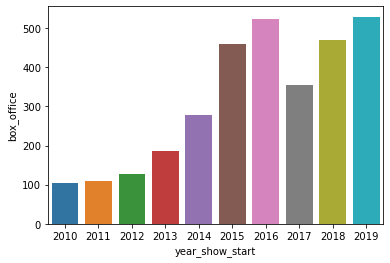

In [32]:
sns.barplot(x=pivot_year_show_start.index, y='box_office', data=pivot_year_show_start)

In [33]:
pivot_year_show_start['puNumber'].mean()

746.4

In [34]:
'{:.0%}'.format(data['box_office'].count() / data.shape[0])

'42%'

В среднем в год выходит около 750 фильмов. В имеющихся данных информация о сборах известна у 42% фильмов, причем у более новых фильмов информации о сборах больше.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [35]:
pivot_table_sum = data.pivot_table(index='year_show_start', values='box_office', aggfunc='sum')
pivot_table_sum

,box_office
year_show_start,
2010,"2,428,654.00"
2011,"14,102,765.00"
2012,"6,954,873.00"
2013,"29,800,256.20"
2014,"7,434,717,843.10"
2015,"38,527,827,199.09"
2016,"46,742,316,269.48"
2017,"48,458,147,253.75"
2018,"49,251,991,405.20"


<AxesSubplot:xlabel='year_show_start'>

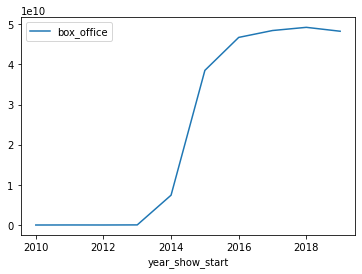

In [36]:
pivot_table_sum.plot()

In [37]:
pivot_table_sum.query('box_office == box_office.min() or box_office == box_office.max()')

,box_office
year_show_start,
2010,"2,428,654.00"
2018,"49,251,991,405.20"


Сумма сборов увеличивается с каждым годом, минимальная сумма сборов была в 2010 году, а максимальная в 2018.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [38]:
data.pivot_table(index='year_show_start', values='box_office', aggfunc = ('mean', 'median'))

,mean,median
year_show_start,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,762.78","5,760.00"
2013,"161,082.47","3,500.00"
2014,"26,743,589.36","18,137.50"
2015,"83,938,621.35","4,784,781.50"
2016,"89,373,453.67","3,776,087.56"
2017,"136,501,823.25","9,919,415.00"
2018,"104,568,983.88","8,751,895.75"


Медианная сумма сборов каждый год гораздо ниже чем средняя, что говорит о том, что есть фильмы с очень большими суммами сборов, которые влияют на среднее значение.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [39]:
age_years_pivot_sum = (data.pivot_table(index='year_show_start', values='box_office', columns = 'age_restriction', aggfunc='sum')
.query('year_show_start >= 2015')
)
age_years_pivot_sum

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_show_start,,,,,
2015,"379,054,578.37","13,419,509,570.51","10,781,600,601.27","5,430,350,628.93","8,517,311,820.01"
2016,"150,228,848.67","11,150,762,103.96","16,594,249,489.74","6,793,929,818.87","12,053,146,008.24"
2017,"229,598,930.00","7,851,427,660.67","18,694,590,951.06","9,651,495,581.02","12,031,034,131.00"
2018,"32,449,002.11","14,267,291,660.69","16,278,405,946.93","8,760,085,501.15","9,913,759,294.32"
2019,"17,746,066.82","12,680,198,773.67","12,753,418,984.60","10,121,796,303.64","12,704,941,824.35"


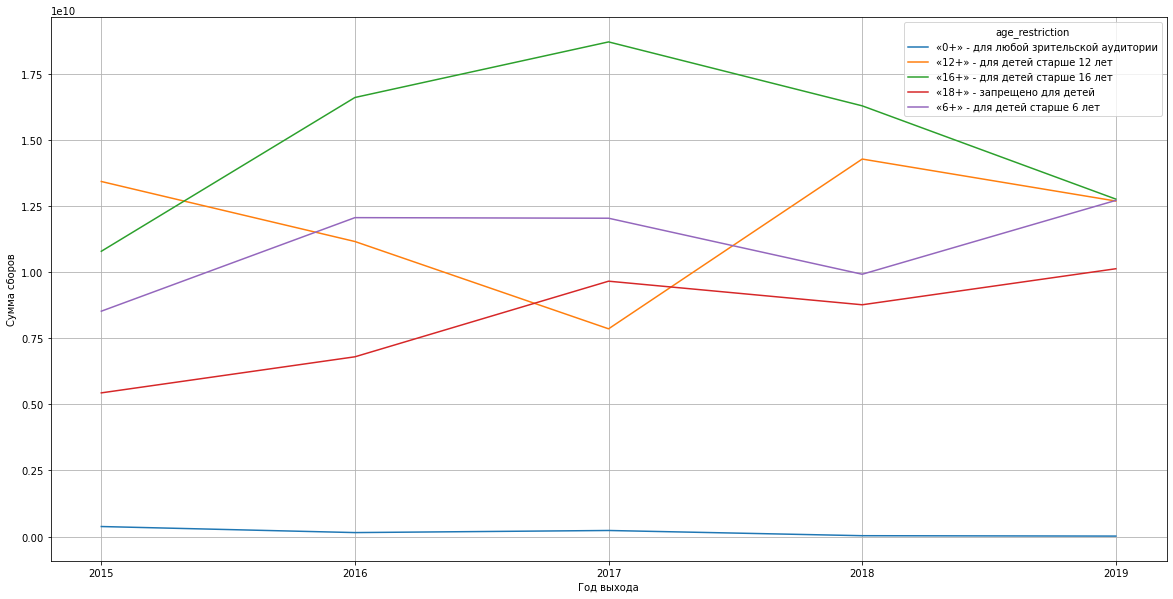

In [40]:
ax = age_years_pivot_sum.plot(figsize=(20, 10), grid=True)
ax.set_ylabel('Сумма сборов')
ax.set_xlabel('Год выхода')
plt.xticks(age_years_pivot_sum.index.values, age_years_pivot_sum.index.values)
plt.show()

In [41]:
for col in age_years_pivot_sum.columns:
    print(age_years_pivot_sum[col].sum(), col) 

809077425.97 «0+» - для любой зрительской аудитории
59369189769.49999 «12+» - для детей старше 12 лет
75102265973.6 «16+» - для детей старше 16 лет
40757657833.61 «18+» - запрещено для детей
55220193077.92 «6+» - для детей старше 6 лет


Сумма сборов с 2015 по 2019 больше всех у фильмов с ограничением «16+» - для детей старше 16 лет 

In [42]:
age_years_pivot_mean = (data.pivot_table(index='year_show_start', values='box_office', columns = 'age_restriction', aggfunc='mean')
.query('year_show_start >= 2015')
)
age_years_pivot_mean

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year_show_start,,,,,
2015,"9,719,348.16","186,382,077.37","65,343,033.95","41,453,058.24","163,794,458.08"
2016,"3,664,118.26","139,384,526.30","91,680,936.41","44,992,912.71","172,187,800.12"
2017,"76,532,976.67","191,498,235.63","155,788,257.93","65,656,432.52","273,432,593.89"
2018,"6,489,800.42","212,944,651.65","105,021,973.85","48,939,025.15","152,519,373.76"
2019,"5,915,355.61","149,178,809.10","71,648,421.26","55,310,362.31","158,811,772.80"


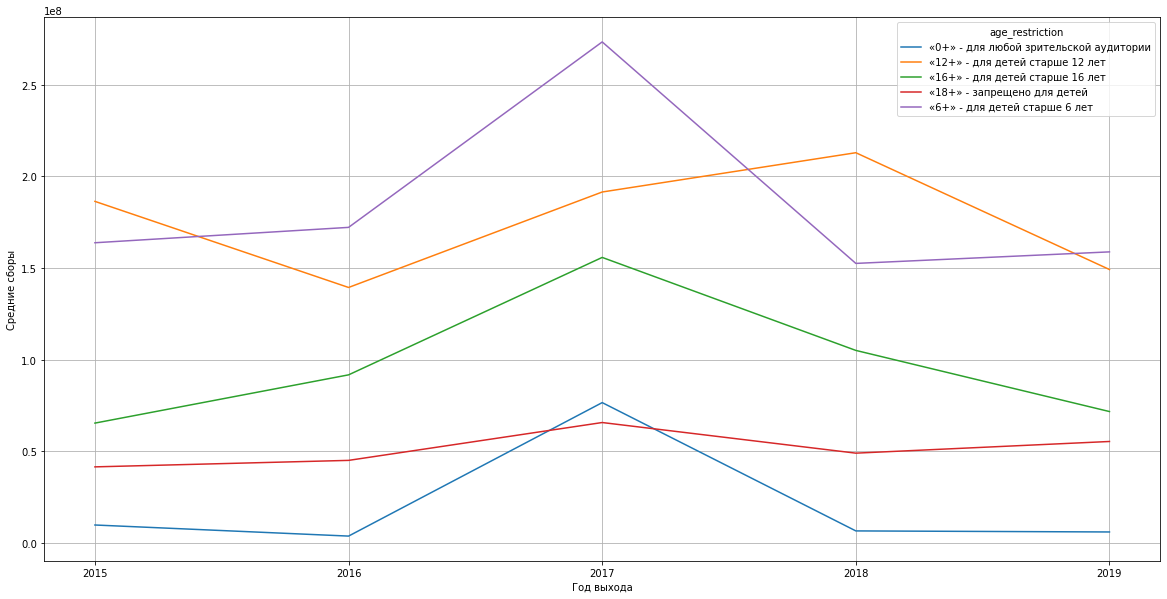

In [43]:
bx = age_years_pivot_mean.plot(figsize=(20, 10), grid=True)
bx.set_ylabel('Средние сборы')
bx.set_xlabel('Год выхода')
plt.xticks(age_years_pivot_mean.index.values, age_years_pivot_mean.index.values)
plt.show()

In [44]:
for col in age_years_pivot_mean.columns:
    print(age_years_pivot_mean[col].mean(), col)

20464319.823782116 «0+» - для любой зрительской аудитории
175877660.0095763 «12+» - для детей старше 12 лет
97896524.67859067 «16+» - для детей старше 16 лет
51270358.185772575 «18+» - запрещено для детей
184149199.72886747 «6+» - для детей старше 6 лет


Среднее сборов с 2015 по 2019 больше у фильмов с ограничением «6+» - для детей старше 6 лет

Подводя итог, можно предположить, что фильмов «16+» выходит больше, поэтому сумма сборов у них больше, однако сборы фильмов «6+» в среднем выше, соответственно они пользуются большим успехом.

#### Вывод

На данном этапе исследования можно сделать следующие выводы:
- В среднем в год выходит около 750 фильмов. В имеющихся данных информация о сборах известна у 42% фильмов, причем у более новых фильмов информации о сборах больше.
- Сумма сборов увеличивается с каждым годом, минимальная сумма сборов была в 2010 году, а максимальная в 2018.
- Есть фильмы с очень большими суммами сборов, которые влияют на среднее значение.
- Фильмов «16+» выходит больше, поэтому сумма сборов у них больше, однако сборы фильмов «6+» в среднем выше, соответственно они пользуются большим успехом.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [45]:
data_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_show_start,main_director,main_genre,%_support_budget
1281,Пока еще жива,111005313,2013-10-12,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-29,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,nan,Не указано,"28,140.00",2014,А.Якимчук,Не указано,0.70
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-06,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-24,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00",2014,М.Угаров,драма,0.62


На данном этапе мы будем работать только с данными о фильмах, которые получили государственную поддержку. Поэтому для начала, удалим строки с пропущенными значениями. А также где необходимо преобразуем тип данных.

In [46]:
len(data_support[data_support['box_office'].isna()])

14

Строк с пропущенными значениями в столбце `box_office` немного, так что их можно удалить.

In [47]:
data_support.dropna(subset =['box_office'], inplace = True)
len(data_support[data_support['box_office'].isna()])

<ipython-input-47-1f38c49404ae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support.dropna(subset =['box_office'], inplace = True)


0

In [48]:
data_support[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']] = data_support[['refundable_support', 'nonrefundable_support', 'budget', 'box_office']].astype('int')

C:\Users\panik\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Создадим столбец `support`, чтобы получить общую сумму господдержки для каждого фильма.

In [49]:
data_support['support'] = data_support['refundable_support'] + data_support['nonrefundable_support']

<ipython-input-49-1886bf3e1dd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['support'] = data_support['refundable_support'] + data_support['nonrefundable_support']


Рассмотрим сумму господдержки, сборов фильмов и бюджета по годам. 

In [50]:
pivot_box_office_support = data_support.pivot_table(index='year_show_start', values=('support', 'box_office', 'budget'), aggfunc='sum')
pivot_box_office_support

,box_office,budget,support
year_show_start,,,
2013,"20,322,384.00","255,435,390.00","134,347,945.00"
2014,"1,007,188,147.00","1,279,484,783.00","549,002,299.00"
2015,"4,815,747,402.00","7,267,670,223.00","3,202,241,459.00"
2016,"4,957,724,350.00","7,210,236,668.00","3,965,635,482.00"
2017,"5,832,345,545.00","6,866,572,568.00","3,063,971,662.00"
2018,"5,098,419,607.00","6,651,694,634.00","3,098,000,000.00"
2019,"3,040,968,265.00","6,602,515,941.00","3,906,000,000.00"


<AxesSubplot:xlabel='year_show_start'>

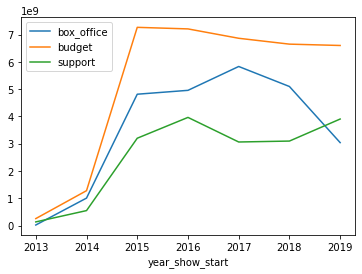

In [51]:
pivot_box_office_support.plot()

Сумма господдержки превысила сумму сборов только в 2015 году. В последующие годы сумма сборов превышала сумму господдержки. Однако сумма сборов превысила общий бюджет фильмов только в 2017 и 2018 годах.

In [52]:
data_support[['%_support_budget', 'ratings']].mean()

%_support_budget   0.52
ratings            6.04
dtype: float64

В среднем процент господдержки от бюджета фильмов составляет 52%.

Средний рейтинг таких фильмов составляет 6 из 10.

In [53]:
data_support.pivot_table(index='year_show_start', values=('ratings', '%_support_budget'), aggfunc='mean')

,%_support_budget,ratings
year_show_start,,
2013,0.47,6.70
2014,0.52,5.96
2015,0.53,6.14
2016,0.55,5.67
2017,0.49,6.05
2018,0.51,6.04
2019,0.49,6.23


Средние значения этих показателей не принципиально отличаются в зависимости от года.

Создадим столбцы `profit`(прибыль фильма, то есть разница между сборами и бюджетом фильма) и `is_profit`(ответ на вопрос прибыльный ли фильм).

In [54]:
data_support['profit'] = data_support['box_office'] - data_support['budget']

<ipython-input-54-c97db34743c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['profit'] = data_support['box_office'] - data_support['budget']


In [55]:
def is_profit(row_values):
    if row_values['profit'] > 0:
        return True
    else:
        return False
data_support['is_profit'] = data_support.apply(is_profit, axis=1)

<ipython-input-55-9ae989a32320>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_support['is_profit'] = data_support.apply(is_profit, axis=1)


In [56]:
data_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year_show_start,main_director,main_genre,%_support_budget,support,profit,is_profit
1281,Пока еще жива,111005313,2013-10-12,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,...,8.10,"драма,мелодрама",365353,2013,А.Атанесян,драма,0.33,26500000,-79046547,False
1448,Бесславные придурки,111003314,2014-03-29,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,...,nan,Не указано,28140,2014,А.Якимчук,Не указано,0.70,26000000,-37114717,False
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,...,5.30,"комедия,фантастика",19957031,2013,Р.Давлетьяров,комедия,0.61,107847945,-156066459,False
1524,БЕРЦЫ,111004314,2014-05-06,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,...,4.20,драма,55917,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,28000000,-40518223,False
1792,Братья Ч,111004414,2014-04-24,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,...,6.40,драма,232100,2014,М.Угаров,драма,0.62,25000000,-39783022,False


Найдем сколько процентов составляют прибыльные фильмы от общего количества фильмов, получивших господдержку. 

In [57]:
'{:.0%}'.format(data_support['is_profit'].mean())

'22%'

Рассмотрим каким жанрам отдают предпочтение при выделении государственной поддержки.

In [58]:
data_support['main_genre'].value_counts().head()

драма         86
комедия       67
мультфильм    25
Не указано    14
триллер       14
Name: main_genre, dtype: int64

In [59]:
data_support.query('is_profit == True')['main_genre'].value_counts().head()

комедия       26
драма         13
мультфильм     8
семейный       3
военный        3
Name: main_genre, dtype: int64

Больше господдержки получают драматические фильмы, но более прибыльными оказались комедии.

In [60]:
data_support['main_director'].value_counts().head()

Р.Давлетьяров    5
С.Андреасян      4
Д.Дьяченко       4
Д.Шмидт          3
А.Цицилин        3
Name: main_director, dtype: int64

In [61]:
data_support.query('is_profit == True')['main_director'].value_counts().head()

Д.Дьяченко        4
Р.Гигинеишвили    2
Д.Киселев         2
Д.Шмидт           2
С.Подгаевский     2
Name: main_director, dtype: int64

Р.Давлетьяров - режиссер, который получил господдержку на большее количество фильмов.

Д.Дьяченко - режиссер, снявший самое большое количество прибыльных фильмов.

#### Вывод

При исследовании фильмов, которые получили государственную поддержку были сделаны следующие выводы:
- Сумма господдержки превысила сумму сборов только в 2015 году. В последующие годы сумма сборов превышала сумму господдержки. Однако сумма сборов превысила общий бюджет фильмов только в 2017 и 2018 годах.
- В среднем процент господдержки от бюджета фильмов составляет 52% и не зависит от года выхода фильма.
- Средний рейтинг таких фильмов составляет 6 из 10.
- Прибыльные фильмы от общего количества фильмов, получивших господдержку, составляют 22%.
- Больше господдержки получают драматические фильмы, но более прибыльными оказались комедии.
- Р.Давлетьяров - режиссер, который получил господдержку на большее количество фильмов.
- Д.Дьяченко - режиссер, снявший самое большое количество прибыльных фильмов.

### Шаг 5. Напишите общий вывод

В процессе исследования предоставленные данные были объединены в один датафрейм, а также был выделен отдельный датафрейм с информацией о фильмах, получивших государственную поддержку. В процессе предобработки данных в таблицах были изучены дубликаты, заполнены пропущенные значения и преобразованы типы данных. Также были устранены ошибки в категориальных и количественных значениях.

В датафреймы были добавлены новые столбцы: `year_show_start`, `main_director`, `main_genre`, `%_support_budget`, `support`, `profit`, `is_profit`.

**Рекомендации**

Прошу обратить внимание на следущие проблемы в данных:
- Дубликаты по названиям фильмов и прокатным удостоверениям.
- Очень много пропущенных значений в столбце `box_office`.
- В столбцах `film_studio`, `production_country`, `producer`, `director`, `genres` есть значения где перечислены категории, поэтому их невозможно сгруппировать.
- Нулевые значения в столбце `budget`.

В имеющихся данных информация о сборах известна у 42% фильмов. Возможно имеющегося объема данных не хватает для корректного анализа. Однако получилось установить, что в среднем в год выходит около 750 фильмов. Больше всего выходит фильмов с возрастным ограничением «16+», но самые большие сборы у фильмов «6+».

Подводя итоги анализа данных о фильмах, которые получили государственную поддержку можно выделить следующее:

В среднем процент господдержки от бюджета фильмов составляет около 50%. Только 20% таких фильмов оказываются прибыльными - сумма сборов превысила общий бюджет фильмов только в 2017 и 2018 годах. 

Средний рейтинг фильмов, получивших госсподержку, составляет 6 из 10. А самым прибыльным жанром можно считать комедии.

Более подробно с выводами можно ознакомиться в п.3.1 и п.4.1. 